Używane biblioteki

In [1]:
import math
import copy
import matplotlib.pyplot as plt
import numpy as np

Interpolacja Lagrange'a

Wielomian interpolacyjny newtona:
P(x) = L0(x) * y0 + L1(x) * y0 + ... Ln * yn


In [2]:
def lagrange_interpolation(xs, ys, x): 

    if len(xs) != len(ys): return

    P = 0 #Value of a polynomial at point x

    for i in range(len(xs)):

        L = 1 #lagrange's base

        for j in range(len(xs)):

            if xs[i] != xs[j]: 

                L *= (x - xs[j]) / (xs[i] - xs[j])

        P += (L * ys[i])

    return P

Iterpolacja Newtona - metoda ilorazów skończonych

Wielomian interpolacyjny Newtona:

Pn(x) = a0 + a1(x - x0) + a2(x - x0)(x - x1) + ... + an(x - x0)(x - x1)(x - xn)

Wielomian interpolacyjny z ilorazami różnicowymi

Pn(x) = f[x0] + (x - x0)f[x0, x1] + (x - x0)(x - x1)f[x0, x1, x2] + ... + (x - x0)(x - x1)...(x-xn-1)f[x0, x1, ..., xn]

In [3]:
def newton_interpolation(xs, ys, x):

    if len(xs) != len(ys): return

    coefficients = [ys[0]]

    #Dfference quotients array
    diffs = copy.deepcopy(ys)
    
    for i in range(len(xs) -2, -1, -1):

        for j in range(0, i + 1):
            
            diffs[j] = (diffs[j+1] - diffs[j]) / (xs[j + ((len(xs) - i) - 1)] - xs[j])

        coefficients.append(diffs[0])

    #horner
    result = coefficients[-1]

    for i in range(len(coefficients) - 2, -1, -1):
        result = result * (x - xs[i]) + coefficients[i]

    return result

Równomiernie rozprowadzone punkty

In [22]:
#return evenly distrubuted x arguments on [a, b]
def get_evenly_distributed(a, b, n = 100):
    
    length = abs(b - a)
    h = length / (n - 1)
    
    return [a + i * h for i in range(n)]

Zera wielomianu Czebyszewa - Inaczej węzły Czebyszewa. Są często używane jako węzły w interpolacji wielomianowej,
ponieważ wynikowy wielomian interpolacyjny minimalizuje efekt Rungego, czyli duże oscylacje wielomianu interpolacyjnego przy krańcach przedziału.

Reference: https://pl.wikipedia.org/wiki/W%C4%99z%C5%82y_Czebyszewa

In [5]:
def get_chebyshev_nodes(a, b, n):

    nodes = []

    for k in range(1, n + 1): #n + 1, because range is exclusive on the right side

        nodes.append( 0.5 * (a + b) + 0.5 * (b - a) *  math.cos( ( (2 * k - 1) / (2 * n) ) * math.pi ) )
    
    return nodes[::-1] #Flipping an array in order to it being consistent with input range

Rysowanie wykresu funkcji danej zbiorem punktow

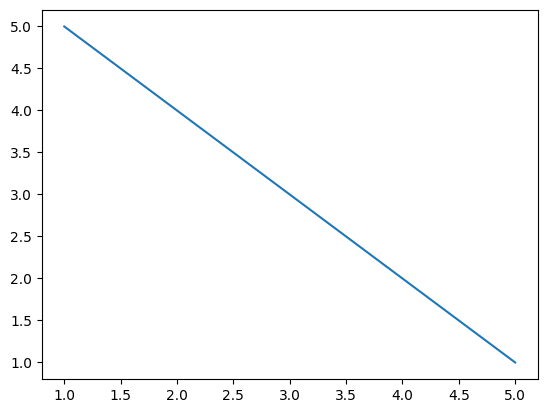

In [6]:
x = [1, 2, 3, 4, 5]
y = [5, 4, 3, 2, 1]

plt.plot(x, y)

Rysowanie funkcji danej wzorem

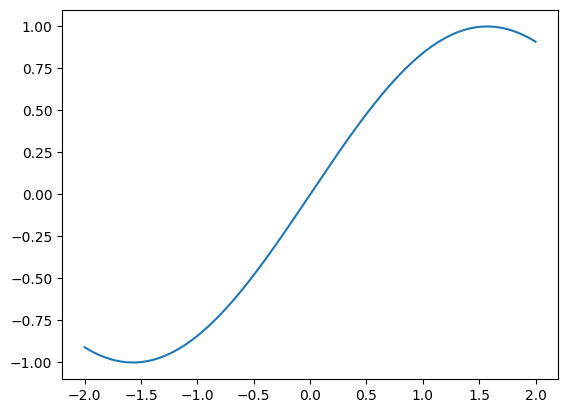

In [19]:
def test_function(x):
    return math.sin(x)

a = -2
b = 2
pts_count = 1000

x = np.linspace(a, b, pts_count)
y = [test_function(x[i]) for i in range(pts_count)]

plt.plot(x, y)

Zadana funkcja

f2(x) = 10 * m + x^2 / k - 10 * m * cos(kx)

k = 1.5
m = 3
x z przedzialu [-4pi, 4pi]

In [24]:
def f2(x, m = 3, k = 1.5):
    return 10 * m + (x**2 / k) - 10 * m * math.cos(k * x)

f2_a = -4 * math.pi
f2_b = 4 * math.pi

Wykres f2

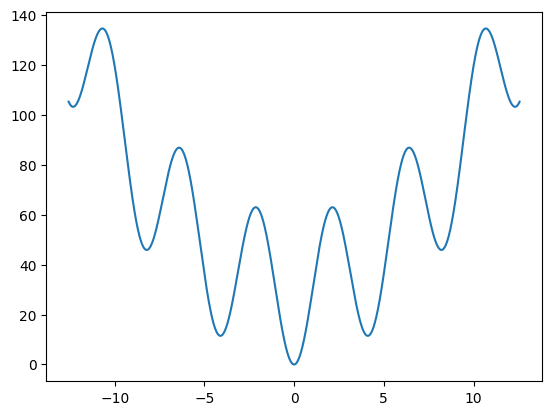

In [35]:
f2_plot_x = np.linspace(f2_a, f2_b, 10000)
f2_plot_y = [f2(f2_plot_x[i]) for i in range(10000)]

plt.plot(f2_plot_x, f2_plot_y)

Interpolacja lagrange'a funkcji f2 dla równomiernie wygenerowanych węzłów

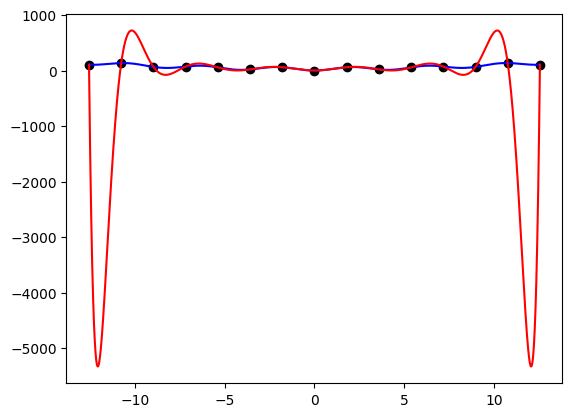

In [108]:
def interpolate_with_lagrange_evenly_distributed(n):

    #xs = get_evenly_distributed(f2_a, f2_b, n)
    xs = get_evenly_distributed(f2_a, f2_b, n)
    ys = [f2(xs[i]) for i in range(len(xs))]

    check_x = get_evenly_distributed(f2_a, f2_b, 10000)
    check_y = []

    for i in range(len(check_x)):

        check_y.append(lagrange_interpolation(xs, ys, check_x[i]))

    plt.scatter(xs, ys, color = 'black')
    plt.plot(f2_plot_x, f2_plot_y, color = 'blue')
    plt.plot(check_x, check_y, color = 'red')

interpolate_with_lagrange_evenly_distributed(n = 15)
plt.show()


Interpolacja lagrange'a funkcji f2 dla węzłów wygenerowanych zgodnie z miejscami zerowymi wielomianu czebyszewa

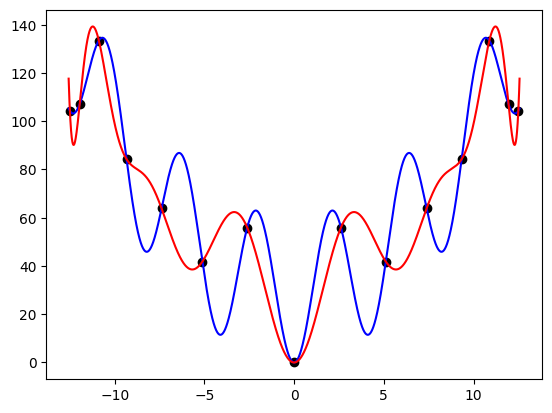

In [109]:
def interpolate_with_lagrange_chebyshev(n):

    #xs = get_evenly_distributed(f2_a, f2_b, n)
    xs = get_chebyshev_nodes(f2_a, f2_b, n)
    ys = [f2(xs[i]) for i in range(len(xs))]

    check_x = get_evenly_distributed(f2_a, f2_b, 10000)
    check_y = []

    for i in range(len(check_x)):

        check_y.append(lagrange_interpolation(xs, ys, check_x[i]))

    plt.scatter(xs, ys, color = 'black')
    plt.plot(f2_plot_x, f2_plot_y, color = 'blue')
    plt.plot(check_x, check_y, color = 'red')

interpolate_with_lagrange_chebyshev(n = 15)
plt.show()


Interpolacja newtona funkcji f2 dla równomiernie wygenerowanych węzłów

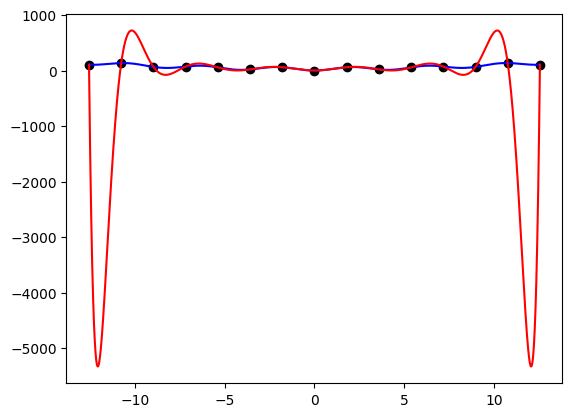

In [110]:
def interpolate_with_newton_evenly_distributed(n):

    #xs = get_evenly_distributed(f2_a, f2_b, n)
    xs = get_evenly_distributed(f2_a, f2_b, n)
    ys = [f2(xs[i]) for i in range(len(xs))]

    check_x = get_evenly_distributed(f2_a, f2_b, 10000)
    check_y = []

    for i in range(len(check_x)):

        check_y.append(newton_interpolation(xs, ys, check_x[i]))

    plt.scatter(xs, ys, color = 'black')
    plt.plot(f2_plot_x, f2_plot_y, color = 'blue')
    plt.plot(check_x, check_y, color = 'red')

interpolate_with_newton_evenly_distributed(n = 15)
plt.show()


Interpolacja newtona funkcji f2 dla węzłów wygenerowanych zgodnie z miejscami zerowymi wielomianu czebyszewa

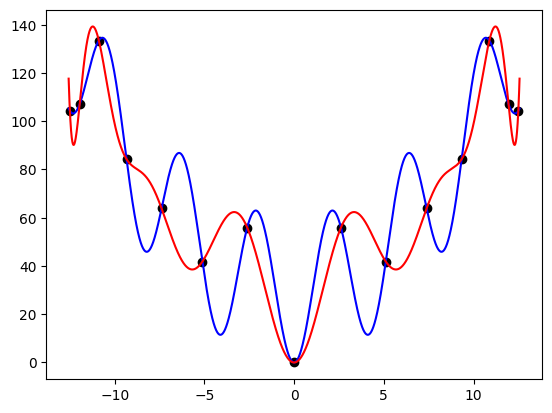

In [111]:
def interpolate_with_newton_chebyshev(n):

    #xs = get_evenly_distributed(f2_a, f2_b, n)
    xs = get_chebyshev_nodes(f2_a, f2_b, n)
    ys = [f2(xs[i]) for i in range(len(xs))]

    check_x = get_evenly_distributed(f2_a, f2_b, 10000)
    check_y = []

    for i in range(len(check_x)):

        check_y.append(newton_interpolation(xs, ys, check_x[i]))

    plt.scatter(xs, ys, color = 'black')
    plt.plot(f2_plot_x, f2_plot_y, color = 'blue')
    plt.plot(check_x, check_y, color = 'red')

interpolate_with_newton_chebyshev(n = 15)
plt.show()


Różnica między wielomianem interpolowanym, a wielomienaem interpolującym

1. Maksimum

max na x należącym do [-4pi, 4pi] z |F(x) - Pn(x)|

2. Błąd średniokwadratowy

!/N suma (F(x) - Pn(x))^2

1. Różnica maksimum dla interpolacji lagrange'a z równomiernie wygenerowanymi węzłami

In [92]:
def langrange_interpolation_evenly_distributed_maximum_difference(test_points_count):

    #Wartości n do przetestowania od 3 do 30
    N = [i for i in range(3, 30 + 1)]

    for i in range(len(N)):

        maksimum = float('-inf')

        #Evenly distributed xs
        xs = get_evenly_distributed(f2_a, f2_b, N[i])
        ys = [f2(xs[i]) for i in range(len(xs))]

        test_x = get_evenly_distributed(f2_a, f2_b, test_points_count)
        
        for j in range(test_points_count):

            temp = abs(f2(test_x[j]) - lagrange_interpolation(xs, ys, test_x[j]))

            maksimum = temp if temp > maksimum else maksimum
    
        print(f"Maksymalna różnica |F(x) - Pn(x)| dla n = {N[i]} jest równa {maksimum}")

langrange_interpolation_evenly_distributed_maximum_difference(1000)

Maksymalna różnica |F(x) - Pn(x)| dla n = 3 jest równa 59.99866494451233
Maksymalna różnica |F(x) - Pn(x)| dla n = 4 jest równa 59.99866494451233
Maksymalna różnica |F(x) - Pn(x)| dla n = 5 jest równa 79.10274521603786
Maksymalna różnica |F(x) - Pn(x)| dla n = 6 jest równa 59.544049793340825
Maksymalna różnica |F(x) - Pn(x)| dla n = 7 jest równa 59.99866494451234
Maksymalna różnica |F(x) - Pn(x)| dla n = 8 jest równa 59.98332765229924
Maksymalna różnica |F(x) - Pn(x)| dla n = 9 jest równa 46.3393319367777
Maksymalna różnica |F(x) - Pn(x)| dla n = 10 jest równa 87.0707003052243
Maksymalna różnica |F(x) - Pn(x)| dla n = 11 jest równa 432.1095884663853
Maksymalna różnica |F(x) - Pn(x)| dla n = 12 jest równa 275.2502251042611
Maksymalna różnica |F(x) - Pn(x)| dla n = 13 jest równa 2675.532194570988
Maksymalna różnica |F(x) - Pn(x)| dla n = 14 jest równa 692.4731371549957
Maksymalna różnica |F(x) - Pn(x)| dla n = 15 jest równa 5428.9486383151625
Maksymalna różnica |F(x) - Pn(x)| dla n = 16 

2. Różnica maksimumm dla interpolacji lagrange'a z węzłami wygenerowanymi zgodnie z zerami wielomianu czebyszewa

In [94]:
def langrange_interpolation_chebyshev_maximum_difference(test_points_count):

    #Wartości n do przetestowania od 3 do 30
    N = [i for i in range(3, 30 + 1)]

    for i in range(len(N)):

        maksimum = float('-inf')

        #Evenly distributed xs
        xs = get_chebyshev_nodes(f2_a, f2_b, N[i])
        ys = [f2(xs[i]) for i in range(len(xs))]

        test_x = get_evenly_distributed(f2_a, f2_b, test_points_count)
        
        for j in range(test_points_count):

            temp = abs(f2(test_x[j]) - lagrange_interpolation(xs, ys, test_x[j]))

            maksimum = temp if temp > maksimum else maksimum
    
        print(f"Maksymalna różnica |F(x) - Pn(x)| dla n = {N[i]} jest równa {maksimum}")

langrange_interpolation_chebyshev_maximum_difference(1000)

Maksymalna różnica |F(x) - Pn(x)| dla n = 3 jest równa 72.64250345658007
Maksymalna różnica |F(x) - Pn(x)| dla n = 4 jest równa 50.253888395184106
Maksymalna różnica |F(x) - Pn(x)| dla n = 5 jest równa 56.80816174269654
Maksymalna różnica |F(x) - Pn(x)| dla n = 6 jest równa 54.52857743041818
Maksymalna różnica |F(x) - Pn(x)| dla n = 7 jest równa 55.04581340044578
Maksymalna różnica |F(x) - Pn(x)| dla n = 8 jest równa 63.209755337423566
Maksymalna różnica |F(x) - Pn(x)| dla n = 9 jest równa 64.15438627229435
Maksymalna różnica |F(x) - Pn(x)| dla n = 10 jest równa 64.25177156804227
Maksymalna różnica |F(x) - Pn(x)| dla n = 11 jest równa 57.12295689109577
Maksymalna różnica |F(x) - Pn(x)| dla n = 12 jest równa 61.27650135763643
Maksymalna różnica |F(x) - Pn(x)| dla n = 13 jest równa 57.50068970044197
Maksymalna różnica |F(x) - Pn(x)| dla n = 14 jest równa 73.3439742849674
Maksymalna różnica |F(x) - Pn(x)| dla n = 15 jest równa 46.14379846805524
Maksymalna różnica |F(x) - Pn(x)| dla n = 16

3. Różnica maksimum dla interpolacji lagrange'a z równomiernie wygenerowanymi węzłami

In [106]:
def newton_interpolation_evenly_distributed_maximum_difference(test_points_count):

    #Wartości n do przetestowania od 3 do 30
    N = [i for i in range(3, 30 + 1)]

    for i in range(len(N)):

        maksimum = float('-inf')

        #Evenly distributed xs
        xs = get_evenly_distributed(f2_a, f2_b, N[i])
        ys = [f2(xs[i]) for i in range(len(xs))]

        test_x = get_evenly_distributed(f2_a, f2_b, test_points_count)
        
        for j in range(test_points_count):

            temp = abs(f2(test_x[j]) - newton_interpolation(xs, ys, test_x[j]))

            maksimum = temp if temp > maksimum else maksimum
    
        print(f"Maksymalna różnica |F(x) - Pn(x)| dla n = {N[i]} jest równa {maksimum}")

newton_interpolation_evenly_distributed_maximum_difference(1000)

Maksymalna różnica |F(x) - Pn(x)| dla n = 3 jest równa 59.99866494451233
Maksymalna różnica |F(x) - Pn(x)| dla n = 4 jest równa 59.99866494451234
Maksymalna różnica |F(x) - Pn(x)| dla n = 5 jest równa 79.10274521603783
Maksymalna różnica |F(x) - Pn(x)| dla n = 6 jest równa 59.54404979334081
Maksymalna różnica |F(x) - Pn(x)| dla n = 7 jest równa 59.99866494451237
Maksymalna różnica |F(x) - Pn(x)| dla n = 8 jest równa 59.98332765229924
Maksymalna różnica |F(x) - Pn(x)| dla n = 9 jest równa 46.339331936777754
Maksymalna różnica |F(x) - Pn(x)| dla n = 10 jest równa 87.0707003052259
Maksymalna różnica |F(x) - Pn(x)| dla n = 11 jest równa 432.1095884663957
Maksymalna różnica |F(x) - Pn(x)| dla n = 12 jest równa 275.2502251042613
Maksymalna różnica |F(x) - Pn(x)| dla n = 13 jest równa 2675.5321945709816
Maksymalna różnica |F(x) - Pn(x)| dla n = 14 jest równa 692.4731371555825
Maksymalna różnica |F(x) - Pn(x)| dla n = 15 jest równa 5428.94863831516
Maksymalna różnica |F(x) - Pn(x)| dla n = 16 

4. Różnica maksimumm dla interpolacji newtona z węzłami wygenerowanymi zgodnie z zerami wielomianu czebyszewa

In [107]:
def newton_interpolation_chebyshev_maximum_difference(test_points_count):

    #Wartości n do przetestowania od 3 do 30
    N = [i for i in range(3, 30 + 1)]

    for i in range(len(N)):

        maksimum = float('-inf')

        #Evenly distributed xs
        xs = get_chebyshev_nodes(f2_a, f2_b, N[i])
        ys = [f2(xs[i]) for i in range(len(xs))]

        test_x = get_evenly_distributed(f2_a, f2_b, test_points_count)
        
        for j in range(test_points_count):

            temp = abs(f2(test_x[j]) - newton_interpolation(xs, ys, test_x[j]))

            maksimum = temp if temp > maksimum else maksimum
    
        print(f"Maksymalna różnica |F(x) - Pn(x)| dla n = {N[i]} jest równa {maksimum}")

newton_interpolation_chebyshev_maximum_difference(1000)

Maksymalna różnica |F(x) - Pn(x)| dla n = 3 jest równa 72.64250345658007
Maksymalna różnica |F(x) - Pn(x)| dla n = 4 jest równa 50.25388839518409
Maksymalna różnica |F(x) - Pn(x)| dla n = 5 jest równa 56.808161742696555
Maksymalna różnica |F(x) - Pn(x)| dla n = 6 jest równa 54.528577430418196
Maksymalna różnica |F(x) - Pn(x)| dla n = 7 jest równa 55.04581340044574
Maksymalna różnica |F(x) - Pn(x)| dla n = 8 jest równa 63.209755337423616
Maksymalna różnica |F(x) - Pn(x)| dla n = 9 jest równa 64.15438627229555
Maksymalna różnica |F(x) - Pn(x)| dla n = 10 jest równa 64.25177156804216
Maksymalna różnica |F(x) - Pn(x)| dla n = 11 jest równa 57.122956891095654
Maksymalna różnica |F(x) - Pn(x)| dla n = 12 jest równa 61.276501357636974
Maksymalna różnica |F(x) - Pn(x)| dla n = 13 jest równa 57.50068970046395
Maksymalna różnica |F(x) - Pn(x)| dla n = 14 jest równa 73.34397428496973
Maksymalna różnica |F(x) - Pn(x)| dla n = 15 jest równa 46.1437984680679
Maksymalna różnica |F(x) - Pn(x)| dla n =

In [ ]:
5. Błąd średniokwadratowy dla interpolacji lagrange'a z równomiernie wygenerowanymi węzłami